In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

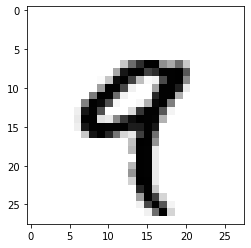

In [ ]:
import matplotlib.pyplot as plt 
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
model = keras.Sequential([
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(16, activation="sigmoid"),
    layers.Dense(16, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


In [ ]:
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 1.6649 - accuracy: 0.6219
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6648 - accuracy: 0.9171
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.9490
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1875 - accuracy: 0.9632
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1324 - accuracy: 0.9726


In [ ]:
  test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1323 - accuracy: 0.9693


In [ ]:
print(f"test_acc:{test_acc}")

test_acc:0.9692999720573425


# Now let's build a CNN 

In [ ]:
model_cnn = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=(3), activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
]) 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255


In [ ]:
model_cnn.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
model_cnn.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 11s 5ms/step - loss: 0.1951 - accuracy: 0.9403
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0515 - accuracy: 0.9842
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0263 - accuracy: 0.9919
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0211 - accuracy: 0.9934


In [ ]:
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9875


In [ ]:
print(f"test_acc:{test_acc}")

test_acc:0.987500011920929


# There are other ways of writing the same model

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=(3), activation="relu") (inputs)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu") (x)
x = layers.Flatten() (x)
outputs = layers.Dense(10, activation="softmax") (x)
model_cnn_2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_cnn_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         73856 

In [ ]:
model_cnn_2.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
model_cnn_2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2020 - accuracy: 0.9371
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0205 - accuracy: 0.9935


In [ ]:
test_loss, test_acc = model_cnn_2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9920


In [ ]:
print(f"test_acc:{test_acc}")

test_acc:0.9919999837875366


# Testing Diffuson models for fun

In [ ]:
!pip install --upgrade keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394 kB 31.5 MB/s 


In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 3s 0us/step


In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

25/25 [==============================] - 66s 3s/step


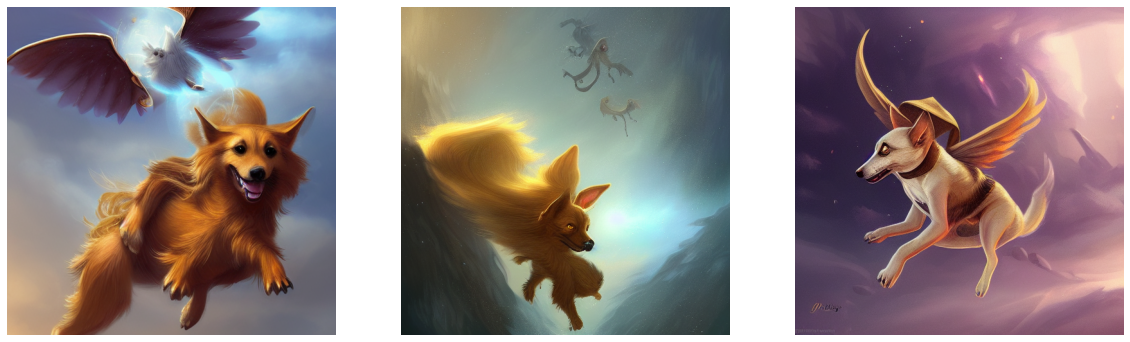

In [ ]:
images = model.text_to_image(
    "cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",
    batch_size=3,
)
plot_images(images)

In [ ]:
images = model.text_to_image(
    "Barcelona at night with a fantasy touch, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting",
    batch_size=3,
)

25/25 [==============================] - 66s 3s/step


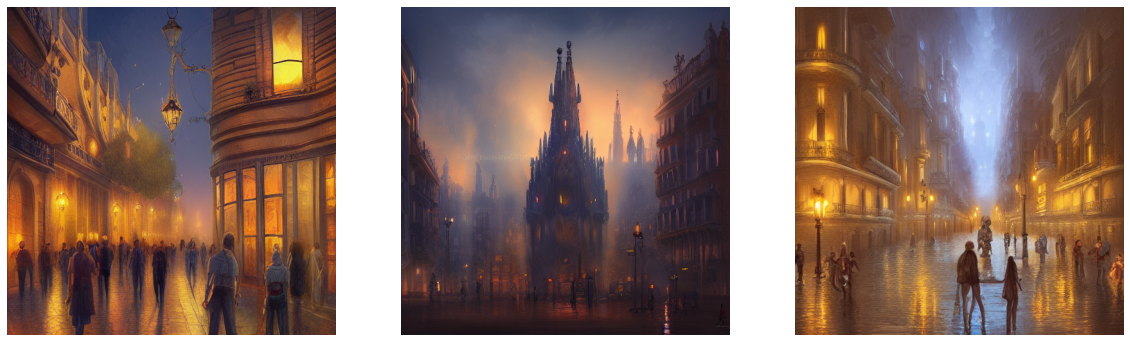

In [ ]:
plot_images(images)

In [ ]:
images = model.text_to_image(
    "Barcelona at night, high quality, highly detailed, elegant, sharp focus",
    batch_size=3,
)

25/25 [==============================] - 65s 3s/step


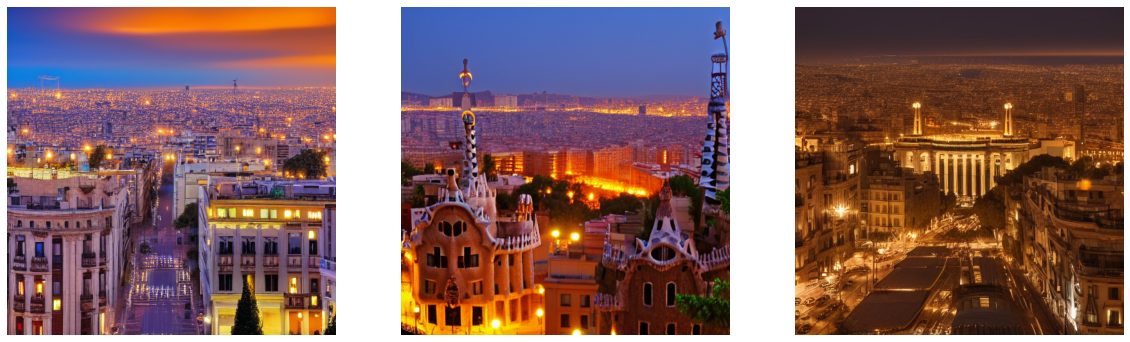

In [ ]:
plot_images(images)

In [ ]:
images = model.text_to_image(
    "The great canyon with a big dragon in it, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, adventure",
    batch_size=3,
)

25/25 [==============================] - 69s 3s/step


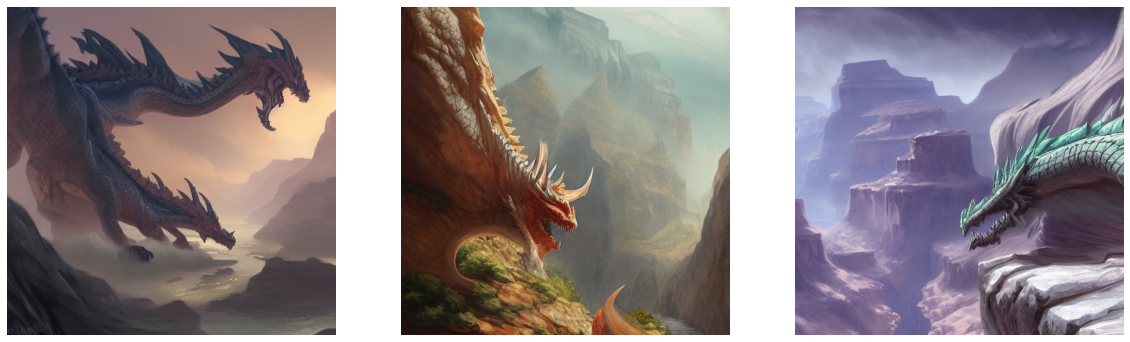

In [ ]:
plot_images(images)

In [ ]:
images = model.text_to_image(
    "A big fantasy dragon in the middle of a beautiful landscape, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting",
    batch_size=3,
)

25/25 [==============================] - 65s 3s/step


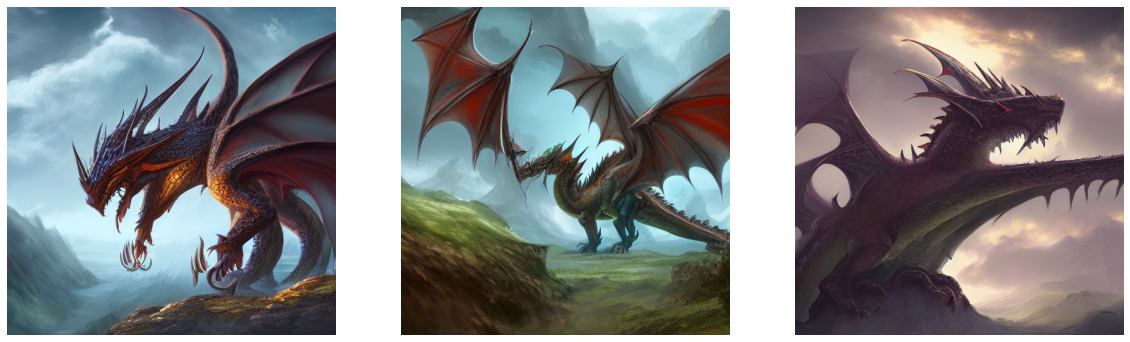

In [ ]:
plot_images(images)

In [ ]:
images = model.text_to_image(
    "A dragon flying over Barcelona, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, adventure",
    batch_size=3,
)

25/25 [==============================] - 65s 3s/step


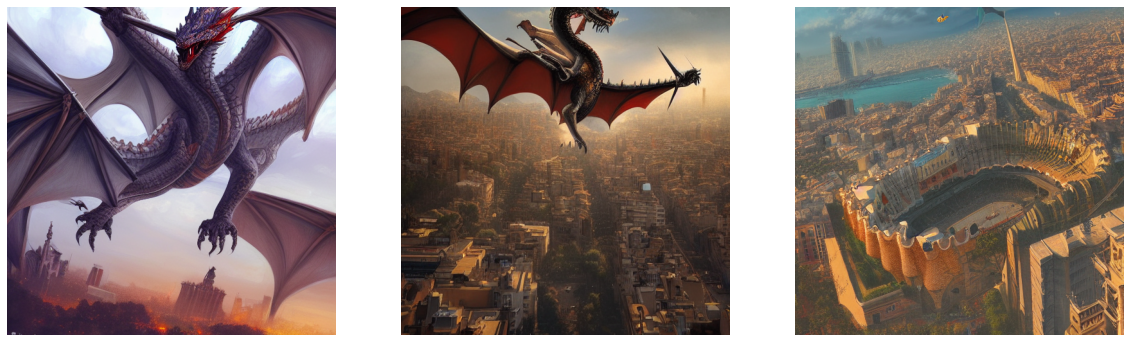

In [ ]:
plot_images(images)

In [ ]:
images = model.text_to_image(
    "A panda in the Iguazu waterfalls, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, adventure",
    batch_size=3,
)

25/25 [==============================] - 69s 3s/step


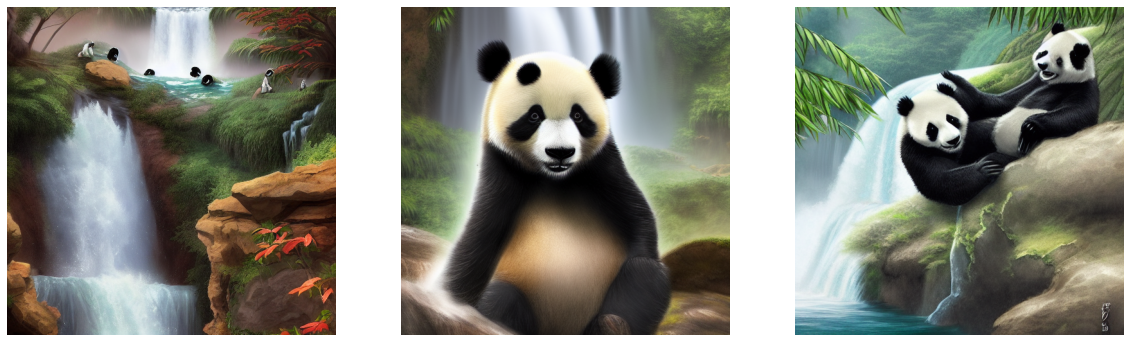

In [ ]:
plot_images(images)

In [ ]:
images = model.text_to_image(
    "A dodo walking around Amsterdam channels, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, adventure",
    batch_size=3,
)

25/25 [==============================] - 68s 3s/step


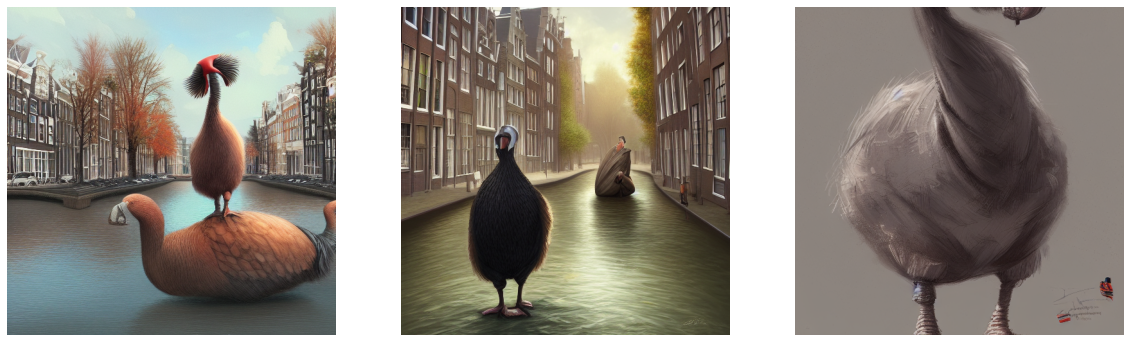

In [ ]:
plot_images(images)

In [ ]:
images = model.text_to_image(
    "A robot in central park, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, adventure",
    batch_size=3,
)

25/25 [==============================] - 64s 3s/step


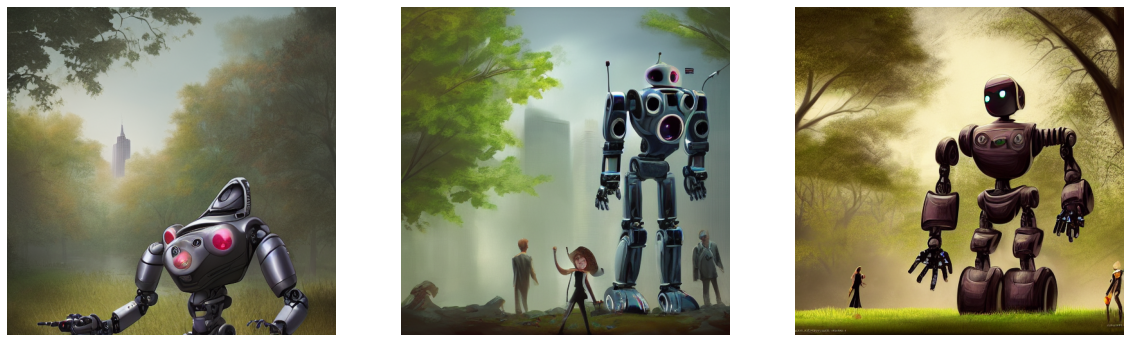

In [ ]:
plot_images(images)